<a href="https://colab.research.google.com/github/DrewHopkins/Solve-2D-Diffusion-Equation/blob/main/Solve_2D_diffusion_equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Solve 2D diffusion equation
\begin{align}
\frac{dT}{dt} = \alpha (\frac{d^2T}{dx^2} + \frac{d^2T}{dy^2})
\end{align}
numerically, using a forward first-order scheme in time and a central second-order scheme in space, with a




*   domain $x ∈ [0,1],\ y ∈ [0,1]$
*   initial condition: $T(x, y, 0) = 0$
*   boundary condition: $T(0, y,t) = 1,\ T(1, y,t) = 0,\ T(x, 0,t) = 0,$ and $T(x, 1,t) = 0$


Use $\alpha =0.05$, the space steps $\Delta x = 0.04,\ \Delta y = 0$.04, and the final times:
> a) $t_f = 0.1$

> b) $t_f = 0.3$

> c) $ t_f= 1$

> d) $t_f = 5$

Calculate the time step using $\Delta t = CFL ∗ min (\Delta x^2, \Delta y^2)/\alpha$, where $CFL$ is a number smaller than, but close
to $0.25$.

> i) For each case (a, b, c and d) plot contours of T (in Matlab, for example, use “contour(x,y,T)”).

> ii) For $t_f = 5$, compare the numerical result with the analytical solution, which is given below in a
matlab script (you can compare contour plots, but you can also consider line plots such as the
solution along a grid line).

In [ ]:
# work by hand is on the next page

# Packages
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

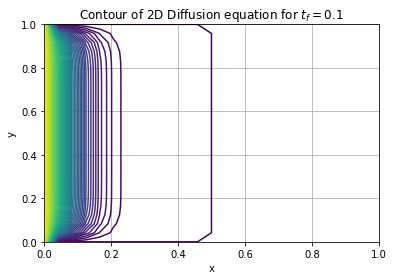

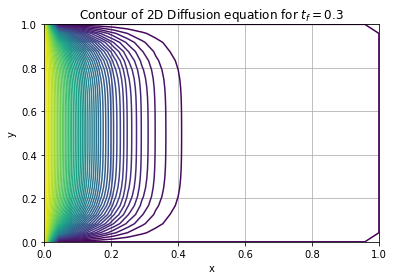

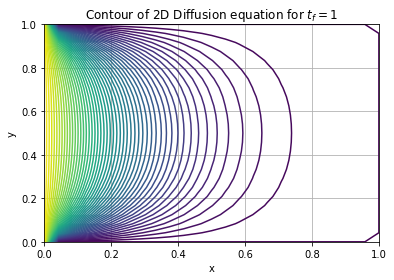

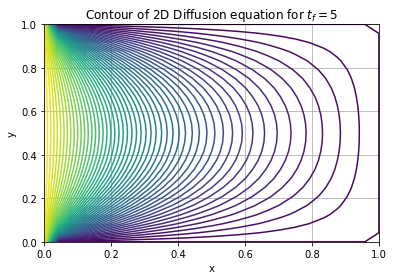

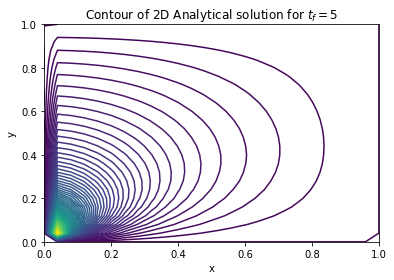

In [ ]:
# block assigns parameters
def given():
  x = pd.Interval(left=0, right=1,closed='both')
  y = pd.Interval(left=0, right=1,closed='both')
  alpha = 0.05
  tf = [0.1,0.3,1,5]
  deltax = 0.04
  deltay = 0.04
  CFL = 0.24 # has to be less but close to 0.25 
  return x,y,alpha,tf,deltax,deltay,CFL

# block assigns delta t
def getDeltat(CFL,deltax,deltay,alpha):
  deltat = CFL * min(deltax**2,deltay**2)/alpha
  return deltat

def numericalScheme(alpha,deltat,deltax,deltay,T,i,j,n):
  ## appends the next time step
  nextT = deltat * alpha *((T[n][j][i+1]-2*T[n][j][i]+T[n][j][i-1])/deltax**2 + (T[n][j+1][i]-2*T[n][j][i]+T[n][j-1][i])/deltay**2)+T[n][j][i]
  return nextT

# assign the parameters
x,y,alpha,tf,deltax,deltay,CFL = given()
deltat = getDeltat(CFL,deltax,deltay,alpha)

# calculate how many x, y and t steps there are so we can find the size of 3d-matrix
xx = int(x.length/deltax)
yy = int(y.length/deltay)
tt = int(tf[-1]/deltat)

# establish 3d-matrix with empty as all entries 
T = np.empty((tt,xx,yy))
for n in range(tt):
  for i in range(xx):
    for j in range(yy):
      T[n][j][i]=0

# set initial condtions
for i in range(xx):
  for j in range(yy):
    T[0][j][i] = 0

# set boundry conditions (note t = 0 is already set)
# T(t,x,y) = 1
for n in range(1,tt):
  for j in range(yy):
    T[n][j][0] = 1
# T(t,1,y) = 0 (note t = 0 is already set)
for n in range(1,tt):
  for j in range(yy):
    T[n][j][-1] = 0
# T(t,x,0) = 0 (note t = 0, x = 0, and x = 1 is already set)
for n in range(1,tt):
  for i in range(1,xx-1):
    T[n][0][i] = 0
# T(t,x,1) = 0 (note t = 0, x = 0, and x = 1 is already set)
for n in range(1,tt):
  for i in range(1,xx-1):
    T[n][-1][i] = 0

# use numerical scheme to fill in other entries 
# (note t = 0, x = 0, x = 1, y = 0, and y = 1 is already set)
for n in range(tt-1):
  for j in range(1,yy-1):
    for i in range(1,xx-1):
      T[n+1][j][i] = numericalScheme(alpha,deltat,deltax,deltay,T,i,j,n)

xaxis = np.linspace(x.left,x.right,25)
yaxis = np.linspace(y.left,y.right,25)
for moment in range(len(tf)):
  t_f = tf[moment]
  t_index = int(t_f/deltat)
  plt.contour(xaxis,yaxis,T[t_index-1],50)


  title = 'Contour of 2D Diffusion equation for $t_f =$' + str(t_f) 
  plt.title(title )
  plt.xlabel('x')
  plt.ylabel('y')

  plt.grid()
  plt.show();

 # block assigns parameters
def given_Analytical():
  x = pd.Interval(left=0, right=1,closed='both')
  y = pd.Interval(left=0, right=1,closed='both')
  deltax = 0.04
  deltay = 0.04
  T0 = 1
  return x,y,deltax,deltay,T0

xxx,yyy,deltax,deltay,T0 = given_Analytical()

x = []
xx = int(xxx.length/deltax+1)
for i in range(xx):
  x.append(i*deltax)
y = []
yy = int(yyy.length/deltay+1)
for j in range(yy):
  y.append(j*deltay)
[X, Y]=np.meshgrid(x, y);
Ta = [[0]*len(y)]*len(x)
for n in range(1,201):
 An=2*T0/(n*np.pi)*((-1)^n-1)/(np.sinh(n*np.pi));
 Ta=Ta+An*np.multiply(np.sin(n*np.pi*X),np.sinh(n*np.pi*(Y-1)));
plt.contour(Y,X,Ta,100);

title = 'Contour of 2D Analytical solution for $t_f = 5$' 
plt.title(title )
plt.xlabel('x')
plt.ylabel('y')
plt.show();
